In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
import time
from qiskit.providers.aer import QasmSimulator
import numpy as np
from qiskit_experiments.library import randomized_benchmarking as rb
#from qiskit_experiments.library import StandardRB, InterleavedRB
from qiskit_experiments.framework import ParallelExperiment, BatchExperiment
from qiskit_experiments.library.randomized_benchmarking import RBUtils
from qiskit_experiments.library import StandardRB, InterleavedRB
import qiskit.circuit.library as circuits
import qiskit.circuit.library
from qiskit.circuit import Delay, Instruction
from qiskit.circuit.library.standard_gates import XGate, SXGate, IGate, CCXGate, SGate
from datetime import datetime


# For simulation
from qiskit.providers.aer import AerSimulator


In [2]:
from qiskit import IBMQ
#IBMQ.save_account('befca44219528a564b7f4d3f53707de8985c22fb7b8c969ef2728c830de7c612716e76f41fbc0a52d65f63e71a3a2437948befd3042b1ffab4ced07d573192f1')
IBMQ.load_account()
IBMQ.providers()

[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>,
 <AccountProvider for IBMQ(hub='ibm-q-community', group='qamp', project='spring-22-17')>,
 <AccountProvider for IBMQ(hub='ibm-q-community', group='qamp', project='spring-22-17-2')>,
 <AccountProvider for IBMQ(hub='ibm-q-skku', group='internal', project='reservations')>,
 <AccountProvider for IBMQ(hub='ibm-q-skku', group='skku', project='squirl')>,
 <AccountProvider for IBMQ(hub='ibm-q-skku', group='skku', project='skku-graduate')>,
 <AccountProvider for IBMQ(hub='qc-spring-22-4', group='group-4', project='recdZ7NwFc2tUZtMH')>]

In [3]:
provider=IBMQ.providers()[1]
#provider = IBMQ.get_provider(hub='ibm-q-community', group='qamp', project='spring-22-17')
#backend=provider.backend.ibmq_lima
backend = provider.get_backend('ibmq_belem')

# get the basic feautures including qubit number of the backend.
config = backend.configuration()
backend_job_limit=backend.job_limit()

print("{0} is on version {1}. It has {2} qubit{3}. It "
      "{4} OpenPulse programs. The basis gates supported on this device are {5}.{6} are the list of connected qubits."
      "{7} can handle maximum {8} circuits(experiments) per job."
      "Maximum number of active job i can have on it (cocurrent jobs that a user is able to submit to a backend) is {9}."
      "".format(config.backend_name,
                config.backend_version,
                config.n_qubits,
                '' if config.n_qubits == 1 else 's',
                'supports' if config.open_pulse else 'does not support',
                config.basis_gates,
                config.coupling_map,
               config.backend_name,
               config.max_experiments,
               backend_job_limit.maximum_jobs))

ibmq_belem is on version 1.0.42. It has 5 qubits. It supports OpenPulse programs. The basis gates supported on this device are ['id', 'rz', 'sx', 'x', 'cx', 'reset'].[[0, 1], [1, 0], [1, 2], [1, 3], [2, 1], [3, 1], [3, 4], [4, 3]] are the list of connected qubits.ibmq_belem can handle maximum 100 circuits(experiments) per job.Maximum number of active job i can have on it (cocurrent jobs that a user is able to submit to a backend) is None.


In [7]:
backend.configuration().timing_constraints

{'acquire_alignment': 16,
 'granularity': 16,
 'min_length': 64,
 'pulse_alignment': 1}

# belem_q0
CLE(0.000115)< X~SX~I~D(0.000200)

- CLE time experiment dont match

In [5]:

from datetime import datetime
date= datetime(2022,5,15,15)
CLE=RBUtils.coherence_limit(nQ=1, T1_list=[backend.properties(datetime=date).t1(0)],
T2_list=[backend.properties(datetime=date).t2(0)], gatelen=backend.properties(datetime=date).gate_length('x',(0)))
print(f"CLE is {CLE} at {date}")

CLE is 0.00016434906802645366 at 2022-05-15 15:00:00


In [6]:

from datetime import datetime
print(backend)
date= datetime(2022,5,27,18)
CLE=RBUtils.coherence_limit(nQ=1, T1_list=[backend.properties(datetime=date).t1(3)],
T2_list=[backend.properties(datetime=date).t2(3)], gatelen=backend.properties(datetime=date).gate_length('x',(3)))
print(f"CLE is {CLE} at {date}")

ibmq_belem
CLE is 0.00012912041313578593 at 2022-05-27 18:00:00


In [9]:
backend.properties(datetime=datetime(2022,5,15,14)).gate_error('x',0)

0.00017916001212748954

# 1q IRB : X, SX Gate
- X 
- SX 


ibmq_belem
2022-05-25 22:22:32.012659


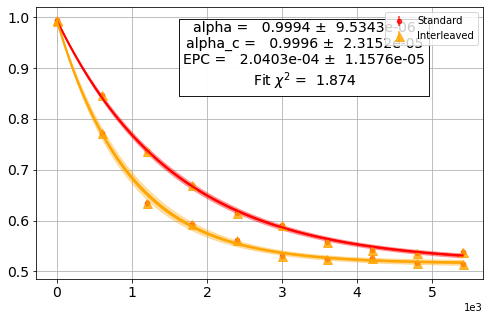

DbAnalysisResultV1
- name: @Parameters_InterleavedRBAnalysis
- value: [0.4777673930291496, 0.9993621409425114, 0.9995919392295016, 0.5162670836487975]
- χ²: 1.8735375431070291
- quality: good
- extra: <4 items>
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: alpha
- value: 0.999362+/-0.000010
- χ²: 1.8735375431070291
- quality: good
- extra: <1 items>
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: alpha_c
- value: 0.999592+/-0.000023
- χ²: 1.8735375431070291
- quality: good
- extra: <1 items>
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: EPC
- value: 0.000204+/-0.000012
- χ²: 1.8735375431070291
- quality: good
- extra: <3 items>
- device_components: ['Q0']
- verified: False


In [8]:
# **XGate
lengths = np.arange(1, 6000, 600)
num_samples = 10
seed = 1010
qubits = [0]
print(backend)
print(datetime.today())

# Run an Interleaved RB experiment on qubit 0
# The interleaved gate is the x gate

int_exp1 = InterleavedRB(circuits.XGate(), qubits, lengths, num_samples=num_samples, seed=seed)

# Run
int_expdata1 = int_exp1.run(backend, shots=1000).block_for_results()
int_results1 = int_expdata1.analysis_results()
# View result data
display(int_expdata1.figure(0))
for result in int_results1:
    print(result)

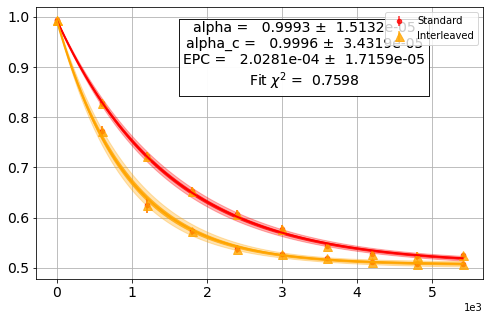

DbAnalysisResultV1
- name: @Parameters_InterleavedRBAnalysis
- value: [0.486980279054897, 0.999319000780858, 0.9995943886945806, 0.5067533993346938]
- χ²: 0.7598378226850521
- quality: good
- extra: <4 items>
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: alpha
- value: 0.999319+/-0.000015
- χ²: 0.7598378226850521
- quality: good
- extra: <1 items>
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: alpha_c
- value: 0.999594+/-0.000034
- χ²: 0.7598378226850521
- quality: good
- extra: <1 items>
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: EPC
- value: 0.000203+/-0.000017
- χ²: 0.7598378226850521
- quality: good
- extra: <3 items>
- device_components: ['Q0']
- verified: False


In [19]:
# **XGate belem 0515
lengths = np.arange(1, 6000, 600)
num_samples = 10
seed = 1010
qubits = [0]

# Run an Interleaved RB experiment on qubit 0
# The interleaved gate is the x gate

int_exp1 = InterleavedRB(circuits.XGate(), qubits, lengths, num_samples=num_samples, seed=seed)

# Run
int_expdata1 = int_exp1.run(backend, shots=1000).block_for_results()
int_results1 = int_expdata1.analysis_results()
# View result data
display(int_expdata1.figure(0))
for result in int_results1:
    print(result)

ibmq_belem
2022-05-27 17:32:34.314284


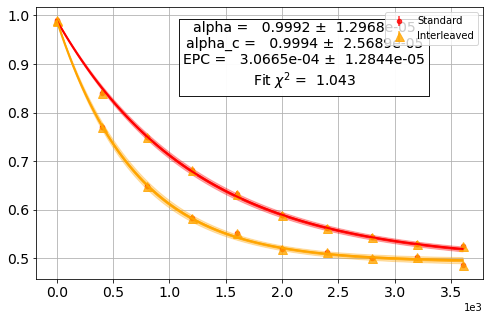

DbAnalysisResultV1
- name: @Parameters_InterleavedRBAnalysis
- value: [0.49667645677302524, 0.9991805116085556, 0.999386695396223, 0.4932327372709079]
- χ²: 1.0428769431681855
- quality: good
- extra: <4 items>
- device_components: ['Q3']
- verified: False
DbAnalysisResultV1
- name: alpha
- value: 0.999181+/-0.000013
- χ²: 1.0428769431681855
- quality: good
- extra: <1 items>
- device_components: ['Q3']
- verified: False
DbAnalysisResultV1
- name: alpha_c
- value: 0.999387+/-0.000026
- χ²: 1.0428769431681855
- quality: good
- extra: <1 items>
- device_components: ['Q3']
- verified: False
DbAnalysisResultV1
- name: EPC
- value: 0.000307+/-0.000013
- χ²: 1.0428769431681855
- quality: good
- extra: <3 items>
- device_components: ['Q3']
- verified: False


In [16]:
# ** SXGate IRB, long Clifford belem 0515
lengths = np.arange(1,4000, 400)
num_samples = 10
seed = 1010
qubits = [3]
print(backend)
print(datetime.today())

# Run an Interleaved RB experiment on qubit 0
# The interleaved gate is the x gate

int_exp1 = InterleavedRB(circuits.SXGate(), qubits, lengths, num_samples=num_samples, seed=seed)

# Run
int_expdata1 = int_exp1.run(backend, shots=1000).block_for_results()
int_results1 = int_expdata1.analysis_results()
# View result data
display(int_expdata1.figure(0))
for result in int_results1:
    print(result)

ibmq_belem
2022-05-27 15:50:46.335622


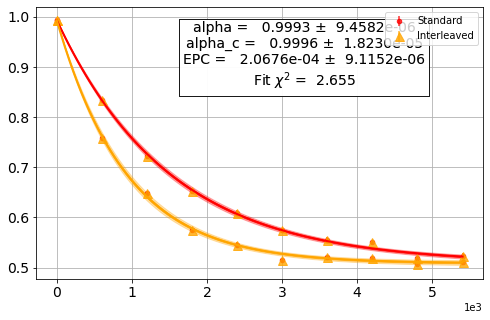

DbAnalysisResultV1
- name: @Parameters_InterleavedRBAnalysis
- value: [0.4850776690860132, 0.9993347375230001, 0.9995864744548677, 0.5085482791669721]
- χ²: 2.6547978798434246
- quality: good
- extra: <4 items>
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: alpha
- value: 0.999335+/-0.000009
- χ²: 2.6547978798434246
- quality: good
- extra: <1 items>
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: alpha_c
- value: 0.999586+/-0.000018
- χ²: 2.6547978798434246
- quality: good
- extra: <1 items>
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: EPC
- value: 0.000207+/-0.000009
- χ²: 2.6547978798434246
- quality: good
- extra: <3 items>
- device_components: ['Q0']
- verified: False


In [12]:
# ** SXGate IRB, long Clifford belem 0515
lengths = np.arange(1,6000, 600)
num_samples = 10
seed = 1010
qubits = [0]
print(backend)
print(datetime.today())

# Run an Interleaved RB experiment on qubit 0
# The interleaved gate is the x gate

int_exp1 = InterleavedRB(circuits.SXGate(), qubits, lengths, num_samples=num_samples, seed=seed)

# Run
int_expdata1 = int_exp1.run(backend, shots=1000).block_for_results()
int_results1 = int_expdata1.analysis_results()
# View result data
display(int_expdata1.figure(0))
for result in int_results1:
    print(result)

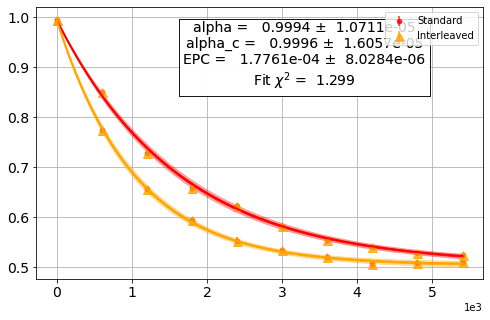

DbAnalysisResultV1
- name: @Parameters_InterleavedRBAnalysis
- value: [0.49026818266181754, 0.9993856302828291, 0.9996447779605532, 0.5040428042016699]
- χ²: 1.2985117927489314
- quality: good
- extra: <4 items>
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: alpha
- value: 0.999386+/-0.000011
- χ²: 1.2985117927489314
- quality: good
- extra: <1 items>
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: alpha_c
- value: 0.999645+/-0.000016
- χ²: 1.2985117927489314
- quality: good
- extra: <1 items>
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: EPC
- value: 0.000178+/-0.000008
- χ²: 1.2985117927489314
- quality: good
- extra: <3 items>
- device_components: ['Q0']
- verified: False


In [20]:
# ** SXGate IRB, long Clifford belem 0515
lengths = np.arange(1,6000, 600)
num_samples = 10
seed = 1010
qubits = [0]

# Run an Interleaved RB experiment on qubit 0
# The interleaved gate is the x gate

int_exp1 = InterleavedRB(circuits.SXGate(), qubits, lengths, num_samples=num_samples, seed=seed)

# Run
int_expdata1 = int_exp1.run(backend, shots=1000).block_for_results()
int_results1 = int_expdata1.analysis_results()
# View result data
display(int_expdata1.figure(0))
for result in int_results1:
    print(result)

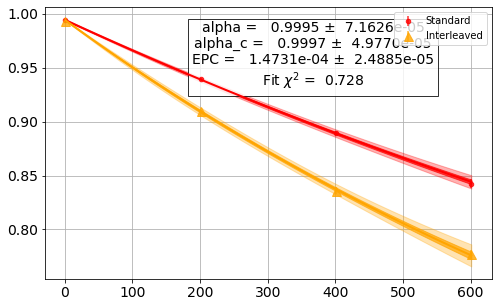

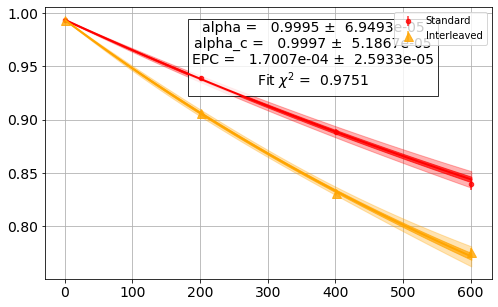

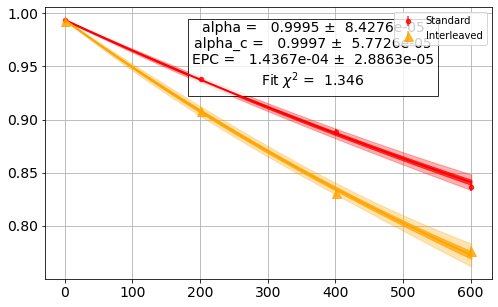

DbAnalysisResultV1
- name: @Parameters_InterleavedRBAnalysis
- value: [0.5704864795879945, 0.9994915185592976, 0.9997053758830936, 0.4239293484130834]
- χ²: 0.7280333467211184
- extra: <5 items>
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: alpha
- value: 0.99949+/-0.00007
- χ²: 0.7280333467211184
- extra: <1 items>
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: alpha_c
- value: 0.99971+/-0.00005
- χ²: 0.7280333467211184
- extra: <1 items>
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: EPC
- value: 0.000147+/-0.000025
- χ²: 0.7280333467211184
- extra: <3 items>
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: @Parameters_InterleavedRBAnalysis
- value: [0.5405653560331101, 0.9994597862345787, 0.9996598589359416, 0.4531831762528742]
- χ²: 0.9750518332041067
- extra: <5 items>
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: alpha
- value: 0.99946+/-0.00007
- χ²: 

In [20]:
# Batch of XGate IRB, short Clifford
lengths = np.arange(1, 800, 200)
num_samples = 10
seed = 1010
qubits = [0,0,0]

# Run an Interleaved RB experiment on qubit 0
# The interleaved gate is the x gate
exps=BatchExperiment(
    [
       InterleavedRB(circuits.XGate(), [qubit], lengths, num_samples=num_samples, seed=seed)
    for qubit in qubits
    ],
    flatten_results=True,
)


# Run
expdata= exps.run(backend).block_for_results()
results = expdata.analysis_results()
# View result data
for i in range(3): 
    display(expdata.figure(i))
for result in results:
    print(result)

# Idling Delay, IGate
- delay : long Clifford
- IGate : long clifford



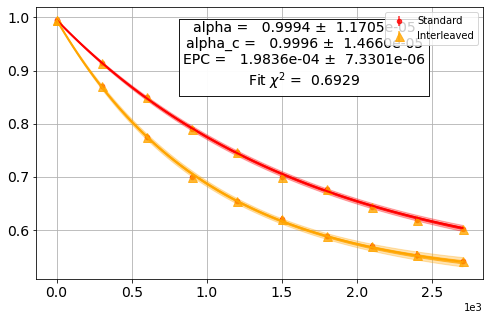

DbAnalysisResultV1
- name: @Parameters_InterleavedRBAnalysis
- value: [0.4884528884964854, 0.9994006235885758, 0.9996032856789795, 0.5068154481753293]
- χ²: 0.692925582655928
- quality: good
- extra: <4 items>
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: alpha
- value: 0.999401+/-0.000012
- χ²: 0.692925582655928
- quality: good
- extra: <1 items>
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: alpha_c
- value: 0.999603+/-0.000015
- χ²: 0.692925582655928
- quality: good
- extra: <1 items>
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: EPC
- value: 0.000198+/-0.000007
- χ²: 0.692925582655928
- quality: good
- extra: <3 items>
- device_components: ['Q0']
- verified: False


In [14]:
# 1q Delay, 3000 short Clifford belem 0515
lengths = np.arange(1, 3000, 300)
num_samples = 10
seed = 1010
qubits = [0]

# Run an Interleaved RB experiment on qubit 0
# The interleaved gate is the x gate
interleaved_element = Delay(160, unit="dt")
int_exp1 = InterleavedRB(interleaved_element, qubits, lengths, num_samples=num_samples, seed=seed)

# Run
int_expdata1 = int_exp1.run(backend, shots=1000).block_for_results()
int_results1 = int_expdata1.analysis_results()
# View result data
display(int_expdata1.figure(0))
for result in int_results1:
    print(result)

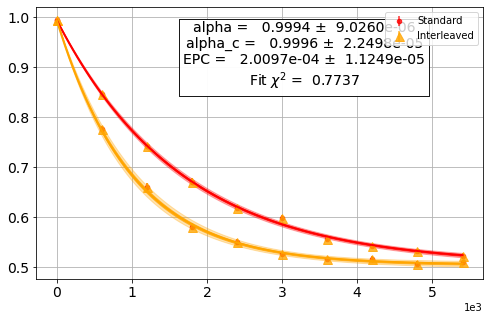

DbAnalysisResultV1
- name: @Parameters_InterleavedRBAnalysis
- value: [0.48886093761700017, 0.9994002945866034, 0.9995980529115224, 0.5054363258609557]
- χ²: 0.7737199754437996
- quality: good
- extra: <4 items>
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: alpha
- value: 0.999400+/-0.000009
- χ²: 0.7737199754437996
- quality: good
- extra: <1 items>
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: alpha_c
- value: 0.999598+/-0.000022
- χ²: 0.7737199754437996
- quality: good
- extra: <1 items>
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: EPC
- value: 0.000201+/-0.000011
- χ²: 0.7737199754437996
- quality: good
- extra: <3 items>
- device_components: ['Q0']
- verified: False


In [24]:
# ** 1q Delay, long Clifford belem 0515
lengths = np.arange(1, 6000, 600)
num_samples = 10
seed = 1010
qubits = [0]

# Run an Interleaved RB experiment on qubit 0
# The interleaved gate is the x gate
# add the reason for 160dt
interleaved_element = Delay(160, unit="dt")
int_exp1 = InterleavedRB(interleaved_element, qubits, lengths, num_samples=num_samples, seed=seed)

# Run
int_expdata1 = int_exp1.run(backend, shots=1000).block_for_results()
int_results1 = int_expdata1.analysis_results()
# View result data
display(int_expdata1.figure(0))
for result in int_results1:
    print(result)

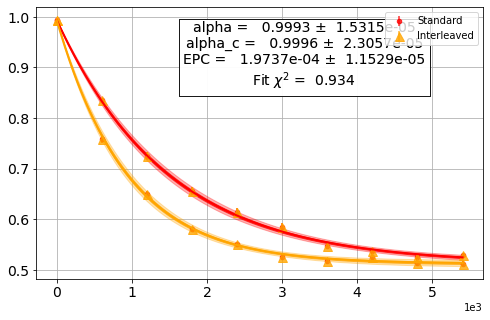

DbAnalysisResultV1
- name: @Parameters_InterleavedRBAnalysis
- value: [0.48178367941586675, 0.9993240663596533, 0.9996052543116689, 0.5122770346701997]
- χ²: 0.9340408899095689
- quality: good
- extra: <4 items>
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: alpha
- value: 0.999324+/-0.000015
- χ²: 0.9340408899095689
- quality: good
- extra: <1 items>
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: alpha_c
- value: 0.999605+/-0.000023
- χ²: 0.9340408899095689
- quality: good
- extra: <1 items>
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: EPC
- value: 0.000197+/-0.000012
- χ²: 0.9340408899095689
- quality: good
- extra: <3 items>
- device_components: ['Q0']
- verified: False


In [23]:
# ** IGate, long Clifford belem 0515
lengths = np.arange(1, 6000, 600)
num_samples = 10
seed = 1010
qubits = [0]

# Run an Interleaved RB experiment on qubit 0
# The interleaved gate is the x gate

int_exp1 = InterleavedRB(circuits.IGate(), qubits, lengths, num_samples=num_samples, seed=seed)

# Run
int_expdata1 = int_exp1.run(backend, shots=1000).block_for_results()
int_results1 = int_expdata1.analysis_results()
# View result data
display(int_expdata1.figure(0))
for result in int_results1:
    print(result)

# Transpilation makes arbitrary duration possible
arbitrary 31ns IRB can be done by transpilation. 
Constrained Reschedule pass add tiny delay which adds up to the multiple of 16dt.(31ns->31.99999968ns)

In [70]:
# not working without the transpilation
lengths = np.arange(1, 800, 200)
num_samples = 10
seed = 1010
qubits = [0]

# Run an Interleaved RB experiment on qubit 0

interleaved_element = Delay(31, unit="ns")
int_exp1 = rb.InterleavedRB(interleaved_element, 
qubits, lengths, num_samples=num_samples, seed=seed)
#int_exp1.set_transpile_options(scheduling_method='asap')

# Run
int_expdata1 = int_exp1.run(backend).block_for_results()
int_results1 = int_expdata1.analysis_results()

c:\users\kimje\qiskit-terra\qiskit\circuit\duration.py:37: UserWarning: Duration is rounded to 140 [dt] = 3.111111e-08 [s] from 3.100000e-08 [s]
  warnings.warn(


TranspilerError: 'The input circuit None is not scheduled. Call one of scheduling passes before running the ConstrainedReschedule pass.'

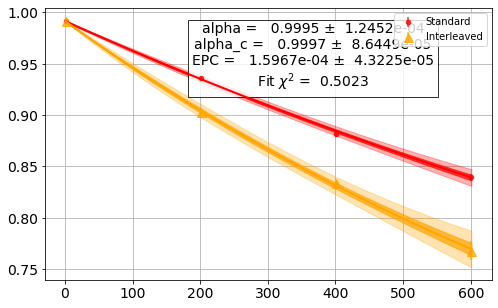

DbAnalysisResultV1
- name: @Parameters_InterleavedRBAnalysis
- value: [0.551165325782576, 0.9994611645138773, 0.999680658270566, 0.4404686658121816]
- χ²: 0.5022660271499568
- extra: <4 items>
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: alpha
- value: 0.99946+/-0.00012
- χ²: 0.5022660271499568
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: alpha_c
- value: 0.99968+/-0.00009
- χ²: 0.5022660271499568
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: EPC
- value: 0.00016+/-0.00004
- χ²: 0.5022660271499568
- extra: <2 items>
- device_components: ['Q0']
- verified: False


In [71]:
# with transpilation arbitrary length works!
lengths = np.arange(1, 800, 200)
num_samples = 10
seed = 1010
qubits = [0]

# Run an Interleaved RB experiment on qubit 0

interleaved_element = Delay(31, unit="ns")
int_exp1 = rb.InterleavedRB(interleaved_element, 
qubits, lengths, num_samples=num_samples, seed=seed)
int_exp1.set_transpile_options(scheduling_method='asap')

# Run
int_expdata1 = int_exp1.run(backend).block_for_results()
int_results1 = int_expdata1.analysis_results()
# View result data
display(int_expdata1.figure(0))
for result in int_results1:
    print(result)

# belem_q0,1
- CLE(0.00753)<DD(0.02104)<CX(0.0375)

In [5]:
date= datetime.today()
qubit='belem_q01'
belem_q01=RBUtils.coherence_limit_error(2, 
backend.properties().gate_length('cx',(3,4)),
 t1s=[backend.properties().t1(0),backend.properties().t1(1)], 
 t2s=[backend.properties().t1(0),backend.properties().t1(1)])

print(f'{qubit} CLE is {belem_q01} on {date}')

belem_q01 CLE is 0.007538763978018359 on 2022-05-30 11:53:24.960238


ibmq_belem
2022-05-27 15:44:59.750190


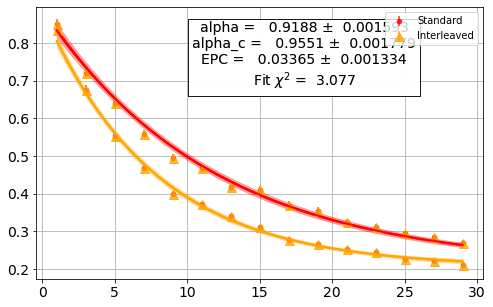

DbAnalysisResultV1
- name: @Parameters_InterleavedRBAnalysis
- value: [0.6844238214706244, 0.9187846746699738, 0.9551347546697135, 0.20515596747920964]
- χ²: 3.076552309290544
- quality: bad
- extra: <4 items>
- device_components: ['Q0', 'Q1']
- verified: False
DbAnalysisResultV1
- name: alpha
- value: 0.9188+/-0.0016
- χ²: 3.076552309290544
- quality: bad
- extra: <1 items>
- device_components: ['Q0', 'Q1']
- verified: False
DbAnalysisResultV1
- name: alpha_c
- value: 0.9551+/-0.0018
- χ²: 3.076552309290544
- quality: bad
- extra: <1 items>
- device_components: ['Q0', 'Q1']
- verified: False
DbAnalysisResultV1
- name: EPC
- value: 0.0336+/-0.0013
- χ²: 3.076552309290544
- quality: bad
- extra: <3 items>
- device_components: ['Q0', 'Q1']
- verified: False


In [11]:
# ** belme cx
lengths = np.arange(1, 30, 2)
num_samples = 10
seed = 1010
qubits = [0,1]
print(backend)
print(datetime.today())
int_exp2 = InterleavedRB(
    circuits.CXGate(), qubits, lengths, num_samples=num_samples, seed=seed)

# Run
int_expdata2 = int_exp2.run(backend, shots=1000).block_for_results()
int_results2 = int_expdata2.analysis_results()
# View result data
display(int_expdata2.figure(0))
for result in int_results2:
    print(result)

ibmq_belem
2022-05-27 15:36:28.841909


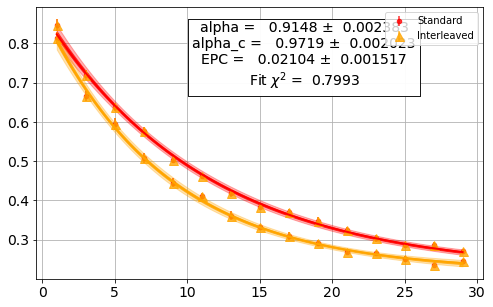

DbAnalysisResultV1
- name: @Parameters_InterleavedRBAnalysis
- value: [0.6613982794789058, 0.9147921323166696, 0.9719406798271213, 0.2180863333263613]
- χ²: 0.7992998924570108
- quality: good
- extra: <4 items>
- device_components: ['Q0', 'Q1']
- verified: False
DbAnalysisResultV1
- name: alpha
- value: 0.9148+/-0.0024
- χ²: 0.7992998924570108
- quality: good
- extra: <1 items>
- device_components: ['Q0', 'Q1']
- verified: False
DbAnalysisResultV1
- name: alpha_c
- value: 0.9719+/-0.0020
- χ²: 0.7992998924570108
- quality: good
- extra: <1 items>
- device_components: ['Q0', 'Q1']
- verified: False
DbAnalysisResultV1
- name: EPC
- value: 0.0210+/-0.0015
- χ²: 0.7992998924570108
- quality: good
- extra: <3 items>
- device_components: ['Q0', 'Q1']
- verified: False


In [10]:
#** belem 2q delay 
lengths = np.arange(1, 30, 2)
num_samples = 10
seed = 1010
qubits = [0,1]
print(backend)
print(datetime.today())

duration=backend.properties().gate_length('cx',(0,1))/backend.configuration().dt
delay_qc = QuantumCircuit(2)
delay_qc.delay(round(duration), [0], unit="dt")
delay_qc.delay(round(duration), [1], unit="dt")
int_exp2 = InterleavedRB(
    interleaved_element=delay_qc, qubits=[0,1], lengths=lengths, num_samples=num_samples, seed=seed)
int_exp2.set_transpile_options(scheduling_method='asap')
# Run
int_expdata2 = int_exp2.run(backend, shots=1000).block_for_results()
int_results2 = int_expdata2.analysis_results()
# View result data
display(int_expdata2.figure(0))
for result in int_results2:
    print(result)

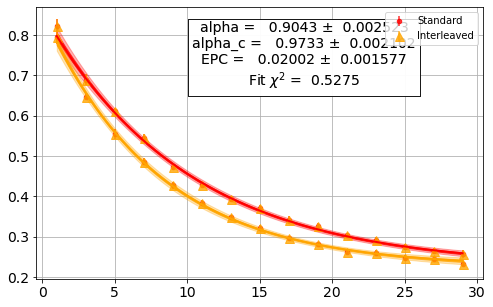

DbAnalysisResultV1
- name: @Parameters_InterleavedRBAnalysis
- value: [0.6340047223547759, 0.9043218402449219, 0.9733113577969509, 0.22458208036163627]
- χ²: 0.527469005178593
- quality: good
- extra: <4 items>
- device_components: ['Q0', 'Q1']
- verified: False
DbAnalysisResultV1
- name: alpha
- value: 0.9043+/-0.0025
- χ²: 0.527469005178593
- quality: good
- extra: <1 items>
- device_components: ['Q0', 'Q1']
- verified: False
DbAnalysisResultV1
- name: alpha_c
- value: 0.9733+/-0.0021
- χ²: 0.527469005178593
- quality: good
- extra: <1 items>
- device_components: ['Q0', 'Q1']
- verified: False
DbAnalysisResultV1
- name: EPC
- value: 0.0200+/-0.0016
- χ²: 0.527469005178593
- quality: good
- extra: <3 items>
- device_components: ['Q0', 'Q1']
- verified: False


In [11]:
#** belem 2q delay 0515
lengths = np.arange(1, 30, 2)
num_samples = 10
seed = 1010
qubits = [0,1]

# Run an Interleaved RB experiment on qubits 0,1
# The interleaved gate is the 2qubit delay circuit (810.6666666ns~3648dt)
delay_qc = QuantumCircuit(2)
delay_qc.delay(3648, [0], unit="dt")
delay_qc.delay(3648, [1], unit="dt")
int_exp2 = InterleavedRB(
    interleaved_element=delay_qc, qubits=[0,1], lengths=lengths, num_samples=num_samples, seed=seed)
int_exp2.set_transpile_options(scheduling_method='asap')
# Run
int_expdata2 = int_exp2.run(backend, shots=1000).block_for_results()
int_results2 = int_expdata2.analysis_results()
# View result data
display(int_expdata2.figure(0))
for result in int_results2:
    print(result)


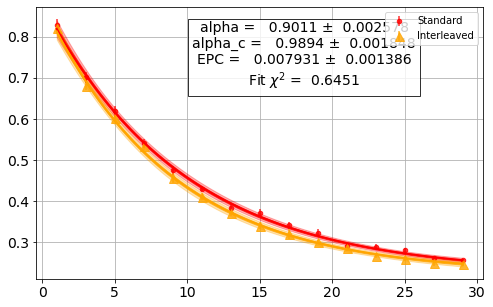

DbAnalysisResultV1
- name: @Parameters_InterleavedRBAnalysis
- value: [0.6593626008576237, 0.9011084760057048, 0.9894249881153087, 0.2246246603077371]
- χ²: 0.6451183035682726
- extra: <4 items>
- device_components: ['Q0', 'Q1']
- verified: False
DbAnalysisResultV1
- name: alpha
- value: 0.9011+/-0.0026
- χ²: 0.6451183035682726
- device_components: ['Q0', 'Q1']
- verified: False
DbAnalysisResultV1
- name: alpha_c
- value: 0.9894+/-0.0018
- χ²: 0.6451183035682726
- device_components: ['Q0', 'Q1']
- verified: False
DbAnalysisResultV1
- name: EPC
- value: 0.0079+/-0.0014
- χ²: 0.6451183035682726
- extra: <2 items>
- device_components: ['Q0', 'Q1']
- verified: False


In [25]:
# ** belme xx 0519
lengths = np.arange(1, 30, 2)
num_samples = 10
seed = 1010
qubits = [0,1]

# Run an Interleaved RB experiment on qubits 0,1
# The interleaved gate is the 2qubit delay circuit (810.6666666ns~3648dt)
qc = QuantumCircuit(2)
qc.x(0)
qc.x(1)

int_exp2 = InterleavedRB(
    interleaved_element=qc, qubits=[0,1], lengths=lengths, num_samples=num_samples, seed=seed)
int_exp2.set_transpile_options(scheduling_method='asap')
# Run
int_expdata2 = int_exp2.run(backend, shots=1000).block_for_results()
int_results2 = int_expdata2.analysis_results()
# View result data
display(int_expdata2.figure(0))
for result in int_results2:
    print(result)

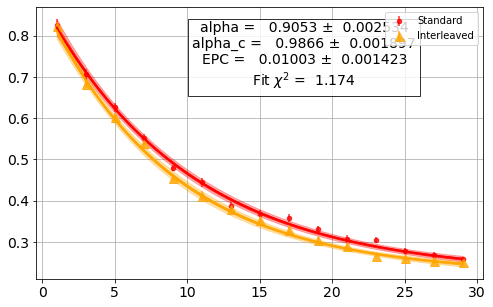

DbAnalysisResultV1
- name: @Parameters_InterleavedRBAnalysis
- value: [0.6587800243891767, 0.9053268680354774, 0.9866245315393012, 0.2229438043522182]
- χ²: 1.1739537162872031
- extra: <4 items>
- device_components: ['Q0', 'Q1']
- verified: False
DbAnalysisResultV1
- name: alpha
- value: 0.9053+/-0.0025
- χ²: 1.1739537162872031
- device_components: ['Q0', 'Q1']
- verified: False
DbAnalysisResultV1
- name: alpha_c
- value: 0.9866+/-0.0019
- χ²: 1.1739537162872031
- device_components: ['Q0', 'Q1']
- verified: False
DbAnalysisResultV1
- name: EPC
- value: 0.0100+/-0.0014
- χ²: 1.1739537162872031
- extra: <2 items>
- device_components: ['Q0', 'Q1']
- verified: False


In [28]:
# ** belme xx 0519
lengths = np.arange(1, 30, 2)
num_samples = 10
seed = 1010
qubits = [0,1]

# Run an Interleaved RB experiment on qubits 0,1
# The interleaved gate is the 2qubit delay circuit (810.6666666ns~3648dt)
qc = QuantumCircuit(2)
qc.x(0)
qc.x(1)

int_exp2 = InterleavedRB(
    interleaved_element=qc, qubits=[0,1], lengths=lengths, num_samples=num_samples, seed=seed)
int_exp2.set_transpile_options(scheduling_method='asap')
# Run
int_expdata2 = int_exp2.run(backend, shots=1000).block_for_results()
int_results2 = int_expdata2.analysis_results()
# View result data
display(int_expdata2.figure(0))
for result in int_results2:
    print(result)

# qc IRB

c:\Users\kimje\anaconda3\envs\devenv\lib\site-packages\qiskit\circuit\duration.py:37: UserWarning: Duration is rounded to 158 [dt] = 3.511111e-08 [s] from 3.500000e-08 [s]
  warnings.warn(


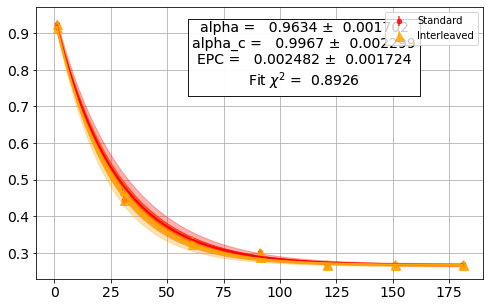

DbAnalysisResultV1
- name: @Parameters_InterleavedRBAnalysis
- value: [0.6790048931861054, 0.9633789793160189, 0.9966912831362648, 0.2664207611900797]
- χ²: 0.8926283370098036
- quality: good
- extra: <4 items>
- device_components: ['Q0', 'Q1']
- verified: False
DbAnalysisResultV1
- name: alpha
- value: 0.9634+/-0.0017
- χ²: 0.8926283370098036
- quality: good
- extra: <1 items>
- device_components: ['Q0', 'Q1']
- verified: False
DbAnalysisResultV1
- name: alpha_c
- value: 0.9967+/-0.0023
- χ²: 0.8926283370098036
- quality: good
- extra: <1 items>
- device_components: ['Q0', 'Q1']
- verified: False
DbAnalysisResultV1
- name: EPC
- value: 0.0025+/-0.0017
- χ²: 0.8926283370098036
- quality: good
- extra: <3 items>
- device_components: ['Q0', 'Q1']
- verified: False


In [44]:
#quadalupe
lengths = np.arange(1, 200, 30)
num_samples = 10
seed = 1010
qubits = [0,1]

# Run an Interleaved RB experiment on qubits 0,1
# The interleaved gate is the 2qubit delay circuit
qc = QuantumCircuit(2)
qc.delay(35, [0], unit="ns")
qc.x(1)
qc.sx(0)
int_exp2 = InterleavedRB(
    interleaved_element=qc, qubits=[0,1], lengths=np.arange(1, 200, 30), num_samples=num_samples, seed=seed)
int_exp2.set_transpile_options(scheduling_method='asap')
# Run
int_expdata2 = int_exp2.run(backend).block_for_results()
int_results2 = int_expdata2.analysis_results()
# View result data
display(int_expdata2.figure(0))
for result in int_results2:
    print(result)

# 3Q RB

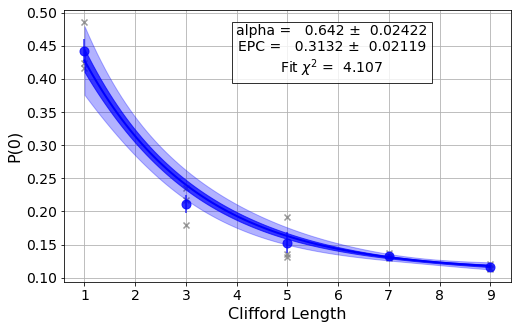

DbAnalysisResultV1
- name: @Parameters_RBAnalysis
- value: [0.49697351816944746, 0.6420160302058863, 0.10869062101398506]
- χ²: 4.107478030074498
- extra: <4 items>
- device_components: ['Q0', 'Q1', 'Q2']
- verified: False
DbAnalysisResultV1
- name: alpha
- value: 0.642+/-0.024
- χ²: 4.107478030074498
- device_components: ['Q0', 'Q1', 'Q2']
- verified: False
DbAnalysisResultV1
- name: EPC
- value: 0.313+/-0.021
- χ²: 4.107478030074498
- device_components: ['Q0', 'Q1', 'Q2']
- verified: False


In [24]:
#3q RB : converge @ 15
lengths = np.arange(1, 10, 2)
num_samples = 3
seed = 1010
qubits = [0,1,2]

# Run an RB experiment on qubit 0
exp1 = StandardRB(qubits, lengths, num_samples=num_samples, seed=seed)
expdata1 = exp1.run(backend).block_for_results()
results1 = expdata1.analysis_results()

# View result data
display(expdata1.figure(0))
for result in results1:
    print(result)

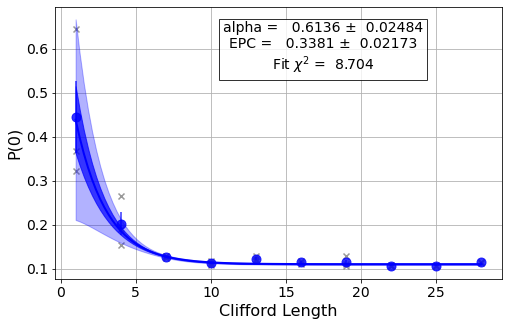

DbAnalysisResultV1
- name: @Parameters_RBAnalysis
- value: [0.5348051386165523, 0.6135967060456341, 0.11033849963795836]
- χ²: 8.703932366086224
- extra: <4 items>
- device_components: ['Q0', 'Q1', 'Q2']
- verified: False
DbAnalysisResultV1
- name: alpha
- value: 0.614+/-0.025
- χ²: 8.703932366086224
- device_components: ['Q0', 'Q1', 'Q2']
- verified: False
DbAnalysisResultV1
- name: EPC
- value: 0.338+/-0.022
- χ²: 8.703932366086224
- device_components: ['Q0', 'Q1', 'Q2']
- verified: False


In [23]:
lengths = np.arange(1, 30, 3)
num_samples = 3
seed = 1010
qubits = [0,1,2]

# Run an RB experiment on qubit 0
exp1 = StandardRB(qubits, lengths, num_samples=num_samples, seed=seed)
expdata1 = exp1.run(backend).block_for_results()
results1 = expdata1.analysis_results()

# View result data
display(expdata1.figure(0))
for result in results1:
    print(result)

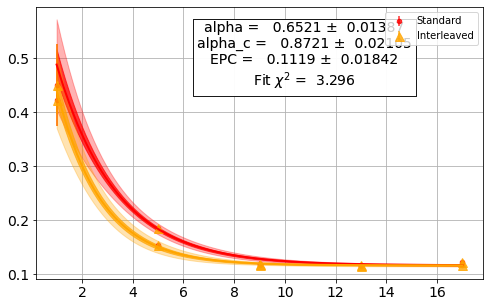

DbAnalysisResultV1
- name: @Parameters_InterleavedRBAnalysis
- value: [0.5705579751783753, 0.6520788089333562, 0.8721028095739104, 0.11659346032469428]
- χ²: 3.2959365085527885
- quality: bad
- extra: <4 items>
- device_components: ['Q0', 'Q1', 'Q2']
- verified: False
DbAnalysisResultV1
- name: alpha
- value: 0.652+/-0.014
- χ²: 3.2959365085527885
- quality: bad
- extra: <1 items>
- device_components: ['Q0', 'Q1', 'Q2']
- verified: False
DbAnalysisResultV1
- name: alpha_c
- value: 0.872+/-0.021
- χ²: 3.2959365085527885
- quality: bad
- extra: <1 items>
- device_components: ['Q0', 'Q1', 'Q2']
- verified: False
DbAnalysisResultV1
- name: EPC
- value: 0.112+/-0.018
- χ²: 3.2959365085527885
- quality: bad
- extra: <3 items>
- device_components: ['Q0', 'Q1', 'Q2']
- verified: False


In [4]:
#3q RB :interleave 3q delay
lengths = np.arange(1, 20, 4)
num_samples = 3
seed = 1010
qubits = [0,1,2]

# Run an RB experiment on qubit 0
qc=QuantumCircuit(3)
qc.delay(3648, [0], unit="dt")
qc.delay(3648, [1], unit="dt")
qc.delay(3648, [2], unit="dt")
exp1 = InterleavedRB(interleaved_element=qc, qubits=qubits, lengths=lengths, num_samples=num_samples, seed=seed)
exp1.set_transpile_options(scheduling_method='asap')
expdata1 = exp1.run(backend).block_for_results()
results1 = expdata1.analysis_results()

# View result data
display(expdata1.figure(0))
for result in results1:
    print(result)

In [27]:
#3q RB :CCXGate not supporting
lengths = np.arange(1, 20, 4)
num_samples = 3
seed = 1010
qubits = [0,1,2]

# Run an RB experiment on qubit 0
exp1 = InterleavedRB(circuits.CCXGate(), qubits, lengths=lengths, num_samples=num_samples, seed=seed)
exp1.set_transpile_options(scheduling_method='asap')
results1 = expdata1.analysis_results()

# View result data
display(expdata1.figure(0))
for result in results1:
    print(result)

QiskitError: 'Interleaved element ccx could not be converted to Clifford element'

# Theretical Coherence limited error with RBUtils

belem(0)

IRB -> EPG_X=2.0281e-4 +- 1.7159e-5

IRB -> EPG_SX=1.7761e-4+-0.80284-5

IRB -> EPG_I=1.9737e-4+-1.1529e-5

IRB -> Delay(160dt)=1.9502e-4+-1.1864e-5

belem(0,1)

IRB -> CX = 3.98 e-2+-0.001693

IRB -> 2qDelay(3648dt) -> 2.002e-2+-0.001577

IRB -> X(0)+X(1) -> 7.931e-3+-0.0013

IRB -> SX(0)+SX(1) -> 1.003e-2+-0.0014

In [16]:
backend.properties().gate_length('cx',(0,1))


8.106666666666666e-07

In [13]:
backend.properties().t1(1)

0.00011354360038911556

In [2]:
belem_q0=RBUtils.coherence_limit_error(1, 0.035, t1s=[91.06], t2s=[92.67])
print(belem_q0)

0.00018991899767269632


In [14]:
belem_q0q1=RBUtils.coherence_limit_error(2, 0.810, t1s=[112.8,113.5], t2s=[129.3, 129.8])
print(belem_q0q1)

0.007820395629463217


# Practice

In [21]:
srb = rb.InterleavedRB(
    Delay(10, unit="us"),
    qubits=[0],
    lengths=[1, 2, 3],
    num_samples=2
)
circuits = srb.circuits()

In [22]:
for circ in circuits:
    print(circ)
    print('---------------------------')

         ░ ┌────────────────┐ ░ »
     q: ─░─┤ circuit-315868 ├─░─»
         ░ └────────────────┘ ░ »
meas: 1/════════════════════════»
                                »
«        ┌──────────────────────────────────────────────────────┐ ░  ░ ┌─┐
«     q: ┤ Clifford: Stabilizer = ['+Y'], Destabilizer = ['-X'] ├─░──░─┤M├
«        └──────────────────────────────────────────────────────┘ ░  ░ └╥┘
«meas: 1/═══════════════════════════════════════════════════════════════╩═
«                                                                       0 
---------------------------
         ░ ┌────────────────┐ ░ ┌────────────────┐ ░ »
     q: ─░─┤ circuit-315868 ├─░─┤ circuit-315869 ├─░─»
         ░ └────────────────┘ ░ └────────────────┘ ░ »
meas: 1/═════════════════════════════════════════════»
                                                     »
«        ┌──────────────────────────────────────────────────────┐ ░  ░ ┌─┐
«     q: ┤ Clifford: Stabilizer = ['+Z'], Destabilizer = ['-X'] ├─░──░─┤M├
« 

In [6]:
circuits[1].draw()

░ ┌────────────┐ ░ ┌────────────┐ ░ »
     q: ─░─┤ circuit-38 ├─░─┤ circuit-39 ├─░─»
         ░ └────────────┘ ░ └────────────┘ ░ »
meas: 1/═════════════════════════════════════»
                                             »
«        ┌──────────────────────────────────────────────────────┐ ░  ░ ┌─┐
«     q: ┤ Clifford: Stabilizer = ['-Z'], Destabilizer = ['+X'] ├─░──░─┤M├
«        └──────────────────────────────────────────────────────┘ ░  ░ └╥┘
«meas: 1/═══════════════════════════════════════════════════════════════╩═
«                                                                       0

In [91]:
interleaved_element = Delay(10, unit="us")

exp = rb.InterleavedRB(
        interleaved_element,
        qubits=[0],
        lengths=[1],
        num_samples=1,
        )

_, int_circ = exp.circuits()

In [92]:
print(int_circ)

         ░ ┌──────────────┐ ░ ┌───────────────┐ ░ »
     q: ─░─┤ circuit-2042 ├─░─┤ Delay(10[us]) ├─░─»
         ░ └──────────────┘ ░ └───────────────┘ ░ »
meas: 1/══════════════════════════════════════════»
                                                  »
«        ┌──────────────────────────────────────────────────────┐ ░  ░ ┌─┐
«     q: ┤ Clifford: Stabilizer = ['-X'], Destabilizer = ['-Z'] ├─░──░─┤M├
«        └──────────────────────────────────────────────────────┘ ░  ░ └╥┘
«meas: 1/═══════════════════════════════════════════════════════════════╩═
«                                                                       0 


In [103]:
print(int_circ.data)

[(Instruction(name='barrier', num_qubits=1, num_clbits=0, params=[]), [Qubit(QuantumRegister(1, 'q'), 0)], []), (Instruction(name='circuit-2042', num_qubits=1, num_clbits=0, params=[]), [Qubit(QuantumRegister(1, 'q'), 0)], []), (Instruction(name='barrier', num_qubits=1, num_clbits=0, params=[]), [Qubit(QuantumRegister(1, 'q'), 0)], []), (Delay(duration=10[unit=us]), [Qubit(QuantumRegister(1, 'q'), 0)], []), (Instruction(name='barrier', num_qubits=1, num_clbits=0, params=[]), [Qubit(QuantumRegister(1, 'q'), 0)], []), (Instruction(name='Clifford: Stabilizer = ['-X'], Destabilizer = ['-Z']', num_qubits=1, num_clbits=0, params=[]), [Qubit(QuantumRegister(1, 'q'), 0)], []), (Instruction(name='barrier', num_qubits=1, num_clbits=0, params=[]), [Qubit(QuantumRegister(1, 'q'), 0)], []), (Instruction(name='barrier', num_qubits=1, num_clbits=0, params=[]), [Qubit(QuantumRegister(1, 'q'), 0)], []), (Instruction(name='measure', num_qubits=1, num_clbits=1, params=[]), [Qubit(QuantumRegister(1, 'q'),

In [109]:
print(int_circ.data[3])

(Delay(duration=10[unit=us]), [Qubit(QuantumRegister(1, 'q'), 0)], [])


In [22]:
backend.properties().t1(0)

9.903423492838085e-05

In [18]:
delay_qc = QuantumCircuit(2)
delay_qc.delay(10, [0,1], "us")

exp = rb.InterleavedRB(interleaved_element=delay_qc, 
qubits=[2,4], lengths=[1,2,3], seed=123, num_samples=1
        )
circuits=exp.circuits()

In [19]:
for circ in circuits:
    print(circ)

         ░ ┌─────────────────┐ ░ »
   q_0: ─░─┤0                ├─░─»
         ░ │  circuit-243018 │ ░ »
   q_1: ─░─┤1                ├─░─»
         ░ └─────────────────┘ ░ »
meas: 2/═════════════════════════»
                                 »
«        ┌───────────────────────────────────────────────────────────────────────┐»
«   q_0: ┤0                                                                      ├»
«        │  Clifford: Stabilizer = ['+IX', '-ZI'], Destabilizer = ['+IY', '-YI'] │»
«   q_1: ┤1                                                                      ├»
«        └───────────────────────────────────────────────────────────────────────┘»
«meas: 2/═════════════════════════════════════════════════════════════════════════»
«                                                                                 »
«         ░  ░ ┌─┐   
«   q_0: ─░──░─┤M├───
«         ░  ░ └╥┘┌─┐
«   q_1: ─░──░──╫─┤M├
«         ░  ░  ║ └╥┘
«meas: 2/═══════╩══╩═
«               0  1 
         ░ ┌─

In [15]:
backend=provider.get_backend('ibmq_belem')

In [25]:
tp=transpile(circuits[0], backend,optimization_level=0, initial_layout=[0,1])
tp.draw()

global phase: π
                ░ ┌─────────┐┌────┐┌─────────┐┌─────────┐ ░ ┌──────────┐»
      q_0 -> 0 ─░─┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├┤ Rz(π/2) ├─░─┤ Rz(-π/2) ├»
                ░ ├─────────┤├───┬┘└─────────┘└─────────┘ ░ ├─────────┬┘»
      q_1 -> 1 ─░─┤ Rz(π/2) ├┤ X ├────────────────────────░─┤ Rz(π/2) ├─»
                ░ └─────────┘└───┘                        ░ └─────────┘ »
ancilla_0 -> 2 ─────────────────────────────────────────────────────────»
                                                                        »
ancilla_1 -> 3 ─────────────────────────────────────────────────────────»
                                                                        »
ancilla_2 -> 4 ─────────────────────────────────────────────────────────»
                                                                        »
       meas: 2/═════════════════════════════════════════════════════════»
                                                                        »
«               ┌─────────┐  ┌────┐  ┌─────────┐                        ░  ░ »
«      q_0 -> 0 ┤ Rz(π/2) ├──┤ √X ├──┤ Rz(π/2) ├────────────────────────░──░─»
«               └──┬────┬─┘┌─┴────┴─┐└──┬────┬─┘┌──────────┐┌─────────┐ ░  ░ »
«      q_1 -> 1 ───┤ √X ├──┤ Rz(2π) ├───┤ √X ├──┤ Rz(7π/2) ├┤ Rz(π/2) ├─░──░─»
«                  └────┘  └────────┘   └────┘  └──────────┘└─────────┘ ░  ░ »
«ancilla_0 -> 2 ─────────────────────────────────────────────────────────────»
«                                                                            »
«ancilla_1 -> 3 ─────────────────────────────────────────────────────────────»
«                                                                            »
«ancilla_2 -> 4 ─────────────────────────────────────────────────────────────»
«                                                                            »
«       meas: 2/═════════════════════════════════════════════════════════════»
«                                                                            »
«               ┌─┐   
«      q_0 -> 0 ┤M├───
«               └╥┘┌─┐
«      q_1 -> 1 ─╫─┤M├
«                ║ └╥┘
«ancilla_0 -> 2 ─╫──╫─
«                ║  ║ 
«ancilla_1 -> 3 ─╫──╫─
«                ║  ║ 
«ancilla_2 -> 4 ─╫──╫─
«                ║  ║ 
«       meas: 2/═╩══╩═
«                0  1

In [24]:
delay_qc = QuantumCircuit(2)
delay_qc.delay(10, [0], unit="us")
delay_qc.x(1)
exp = rb.InterleavedRB(
            interleaved_element=delay_qc, qubits=[1, 2], lengths=[1], seed=123, num_samples=1
        )
_, int_circ = exp.circuits()

qc = QuantumCircuit(2)
qc.x(1)

In [25]:
print(delay_qc)
print(qc)

     ┌───────────────┐
q_0: ┤ Delay(10[us]) ├
     └─────┬───┬─────┘
q_1: ──────┤ X ├──────
           └───┘      
          
q_0: ─────
     ┌───┐
q_1: ┤ X ├
     └───┘


In [130]:
print(int_circ)

         ░ ┌───────────────┐ ░ ┌───────────────┐ ░ »
   q_0: ─░─┤0              ├─░─┤0              ├─░─»
         ░ │  circuit-2463 │ ░ │  circuit-2460 │ ░ »
   q_1: ─░─┤1              ├─░─┤1              ├─░─»
         ░ └───────────────┘ ░ └───────────────┘ ░ »
meas: 2/═══════════════════════════════════════════»
                                                   »
«        ┌───────────────────────────────────────────────────────────────────────┐»
«   q_0: ┤0                                                                      ├»
«        │  Clifford: Stabilizer = ['+IX', '+ZI'], Destabilizer = ['+IY', '-YI'] │»
«   q_1: ┤1                                                                      ├»
«        └───────────────────────────────────────────────────────────────────────┘»
«meas: 2/═════════════════════════════════════════════════════════════════════════»
«                                                                                 »
«         ░  ░ ┌─┐   
«   q_0: ─░──░─┤M├─

In [129]:
print(int_circ.data)

[(Instruction(name='barrier', num_qubits=2, num_clbits=0, params=[]), [Qubit(QuantumRegister(2, 'q'), 0), Qubit(QuantumRegister(2, 'q'), 1)], []), (Instruction(name='circuit-2463', num_qubits=2, num_clbits=0, params=[]), [Qubit(QuantumRegister(2, 'q'), 0), Qubit(QuantumRegister(2, 'q'), 1)], []), (Instruction(name='barrier', num_qubits=2, num_clbits=0, params=[]), [Qubit(QuantumRegister(2, 'q'), 0), Qubit(QuantumRegister(2, 'q'), 1)], []), (Instruction(name='circuit-2460', num_qubits=2, num_clbits=0, params=[]), [Qubit(QuantumRegister(2, 'q'), 0), Qubit(QuantumRegister(2, 'q'), 1)], []), (Instruction(name='barrier', num_qubits=2, num_clbits=0, params=[]), [Qubit(QuantumRegister(2, 'q'), 0), Qubit(QuantumRegister(2, 'q'), 1)], []), (Instruction(name='Clifford: Stabilizer = ['+IX', '+ZI'], Destabilizer = ['+IY', '-YI']', num_qubits=2, num_clbits=0, params=[]), [Qubit(QuantumRegister(2, 'q'), 0), Qubit(QuantumRegister(2, 'q'), 1)], []), (Instruction(name='barrier', num_qubits=2, num_clbit

In [131]:
print(int_circ.data[5][0])

Instruction(name='Clifford: Stabilizer = ['+IX', '+ZI'], Destabilizer = ['+IY', '-YI']', num_qubits=2, num_clbits=0, params=[])


In [125]:
print(int_circ.data[1][0])

Instruction(name='circuit-2463', num_qubits=2, num_clbits=0, params=[])


In [127]:
a=int_circ.compose(qc)

In [4]:
lengths = np.arange(1, 1000, 100)
num_samples = 10
seed = 1010
qubits = range(6)

# Run a parallel 1-qubit RB experiment on qubits 0, 1, 2
exps = [StandardRB([i], lengths, num_samples=num_samples, seed=seed + i)
        for i in qubits]
par_exp = ParallelExperiment(exps)
par_expdata = par_exp.run(backend).block_for_results()
par_results = par_expdata.analysis_results()

# View result data
for result in par_results:
    print(result)
    print("\nextra:")
    print(result.extra)

DbAnalysisResultV1
- name: StandardRB
- value: 9084cb6e-b6fa-4ae9-be61-20d61f331795
- device_components: ['Q0']
- verified: False

extra:
{}
DbAnalysisResultV1
- name: StandardRB
- value: 202c9a50-8e2a-4f59-9bcd-a34f4ab5bf97
- device_components: ['Q1']
- verified: False

extra:
{}
DbAnalysisResultV1
- name: StandardRB
- value: 07b466cf-3e8d-41b7-82fd-1ac1502bd11e
- device_components: ['Q2']
- verified: False

extra:
{}
DbAnalysisResultV1
- name: StandardRB
- value: 453e4e3f-3527-4d1a-9f4f-da9ced480df2
- device_components: ['Q3']
- verified: False

extra:
{}
DbAnalysisResultV1
- name: StandardRB
- value: 26238bb5-c0e4-4717-a9de-fa092c0e20e7
- device_components: ['Q4']
- verified: False

extra:
{}
DbAnalysisResultV1
- name: StandardRB
- value: 6b92e96a-f26a-47b4-9c2b-34652ab7783e
- device_components: ['Q5']
- verified: False

extra:
{}


In [22]:
print(type(par_expdata.child_data()))

<class 'list'>


Component experiment 0


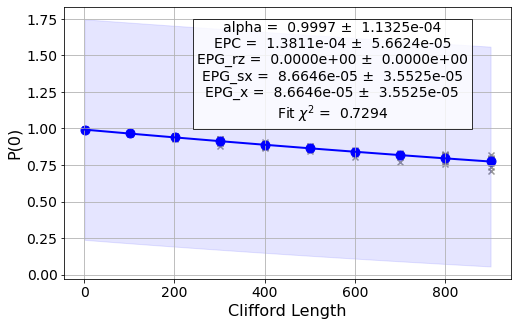

DbAnalysisResultV1
- name: @Parameters_RBAnalysis
- value: [9.92245399e-01 9.99723790e-01 1.81816548e-16] ± [3.77113767e-01 1.13247245e-04 3.77162431e-01]
- χ²: 0.7293971062763311
- extra: <4 items>
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: alpha
- value: 0.9997237896699585 ± 0.00011324724496987608
- χ²: 0.7293971062763311
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: EPC
- value: 0.0001381051650207743 ± 5.662362248493804e-05
- χ²: 0.7293971062763311
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: EPG_rz
- value: 0.0 ± 0.0
- χ²: 0.7293971062763311
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: EPG_sx
- value: 8.664609803266843e-05 ± 3.552521691753338e-05
- χ²: 0.7293971062763311
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: EPG_x
- value: 8.664609803266843e-05 ± 3.552521691753338e-05
- χ²: 0.7293971062763311
- device_components: ['Q0']
- verified: Fals

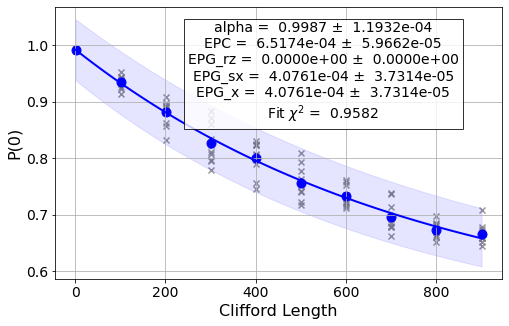

DbAnalysisResultV1
- name: @Parameters_RBAnalysis
- value: [0.48288762 0.99869651 0.50906442] ± [0.02693402 0.00011932 0.02697719]
- χ²: 0.9581669058971745
- extra: <4 items>
- device_components: ['Q1']
- verified: False
DbAnalysisResultV1
- name: alpha
- value: 0.9986965111097604 ± 0.00011932385843997176
- χ²: 0.9581669058971745
- device_components: ['Q1']
- verified: False
DbAnalysisResultV1
- name: EPC
- value: 0.000651744445119784 ± 5.966192921998588e-05
- χ²: 0.9581669058971745
- device_components: ['Q1']
- verified: False
DbAnalysisResultV1
- name: EPG_rz
- value: 0.0 ± 0.0
- χ²: 0.9581669058971745
- device_components: ['Q1']
- verified: False
DbAnalysisResultV1
- name: EPG_sx
- value: 0.00040761389779512544 ± 3.731375342196548e-05
- χ²: 0.9581669058971745
- device_components: ['Q1']
- verified: False
DbAnalysisResultV1
- name: EPG_x
- value: 0.00040761389779512544 ± 3.731375342196548e-05
- χ²: 0.9581669058971745
- device_components: ['Q1']
- verified: False
Component experiment 

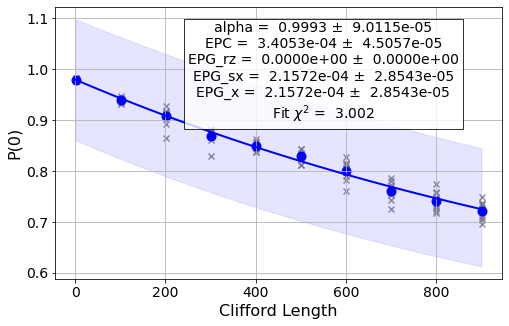

DbAnalysisResultV1
- name: @Parameters_RBAnalysis
- value: [0.55510957 0.99931894 0.42454479] ± [5.93320631e-02 9.01148075e-05 5.94691904e-02]
- χ²: 3.0019397317997947
- extra: <4 items>
- device_components: ['Q2']
- verified: False
DbAnalysisResultV1
- name: alpha
- value: 0.9993189423434757 ± 9.011480746929744e-05
- χ²: 3.0019397317997947
- device_components: ['Q2']
- verified: False
DbAnalysisResultV1
- name: EPC
- value: 0.00034052882826213215 ± 4.505740373464872e-05
- χ²: 3.0019397317997947
- device_components: ['Q2']
- verified: False
DbAnalysisResultV1
- name: EPG_rz
- value: 0.0 ± 0.0
- χ²: 3.0019397317997947
- device_components: ['Q2']
- verified: False
DbAnalysisResultV1
- name: EPG_sx
- value: 0.00021572064383548235 ± 2.8543287194796835e-05
- χ²: 3.0019397317997947
- device_components: ['Q2']
- verified: False
DbAnalysisResultV1
- name: EPG_x
- value: 0.00021572064383548235 ± 2.8543287194796835e-05
- χ²: 3.0019397317997947
- device_components: ['Q2']
- verified: False
Compon

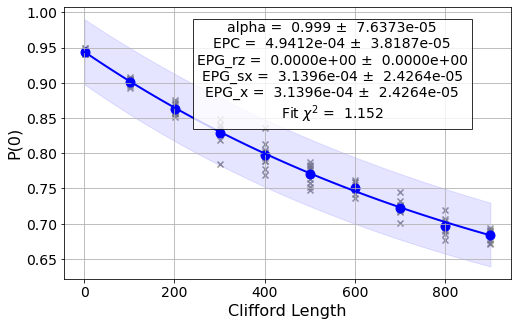

DbAnalysisResultV1
- name: @Parameters_RBAnalysis
- value: [0.44216398 0.99901177 0.5020253 ] ± [2.29208473e-02 7.63734954e-05 2.32793787e-02]
- χ²: 1.1521753218785256
- extra: <4 items>
- device_components: ['Q3']
- verified: False
DbAnalysisResultV1
- name: alpha
- value: 0.99901176792481 ± 7.637349536197335e-05
- χ²: 1.1521753218785256
- device_components: ['Q3']
- verified: False
DbAnalysisResultV1
- name: EPC
- value: 0.0004941160375950271 ± 3.818674768098667e-05
- χ²: 1.1521753218785256
- device_components: ['Q3']
- verified: False
DbAnalysisResultV1
- name: EPG_rz
- value: 0.0 ± 0.0
- χ²: 1.1521753218785256
- device_components: ['Q3']
- verified: False
DbAnalysisResultV1
- name: EPG_sx
- value: 0.0003139631005542484 ± 2.426399628791566e-05
- χ²: 1.1521753218785256
- device_components: ['Q3']
- verified: False
DbAnalysisResultV1
- name: EPG_x
- value: 0.0003139631005542484 ± 2.426399628791566e-05
- χ²: 1.1521753218785256
- device_components: ['Q3']
- verified: False
Component exp

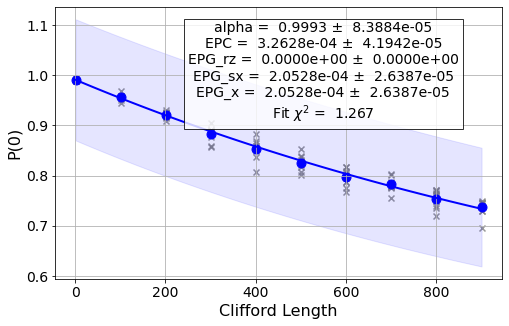

DbAnalysisResultV1
- name: @Parameters_RBAnalysis
- value: [0.57835155 0.99934744 0.41258524] ± [6.02674787e-02 8.38838243e-05 6.03425254e-02]
- χ²: 1.2674294655265879
- extra: <4 items>
- device_components: ['Q4']
- verified: False
DbAnalysisResultV1
- name: alpha
- value: 0.9993474402741366 ± 8.388382426427733e-05
- χ²: 1.2674294655265879
- device_components: ['Q4']
- verified: False
DbAnalysisResultV1
- name: EPC
- value: 0.00032627986293171096 ± 4.194191213213866e-05
- χ²: 1.2674294655265879
- device_components: ['Q4']
- verified: False
DbAnalysisResultV1
- name: EPG_rz
- value: 0.0 ± 0.0
- χ²: 1.2674294655265879
- device_components: ['Q4']
- verified: False
DbAnalysisResultV1
- name: EPG_sx
- value: 0.00020527602494956938 ± 2.6387374703144065e-05
- χ²: 1.2674294655265879
- device_components: ['Q4']
- verified: False
DbAnalysisResultV1
- name: EPG_x
- value: 0.00020527602494956938 ± 2.6387374703144065e-05
- χ²: 1.2674294655265879
- device_components: ['Q4']
- verified: False
Compon

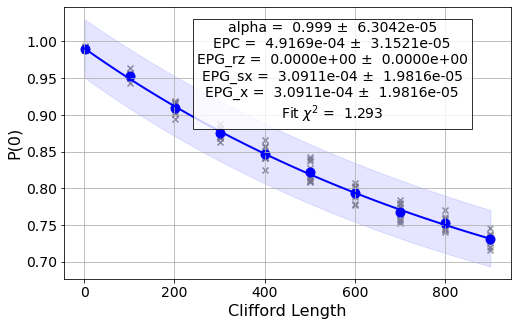

DbAnalysisResultV1
- name: @Parameters_RBAnalysis
- value: [0.44145264 0.99901661 0.54926077] ± [1.97674136e-02 6.30419090e-05 1.98910838e-02]
- χ²: 1.2926848189157851
- extra: <4 items>
- device_components: ['Q5']
- verified: False
DbAnalysisResultV1
- name: alpha
- value: 0.999016611660318 ± 6.304190900799811e-05
- χ²: 1.2926848189157851
- device_components: ['Q5']
- verified: False
DbAnalysisResultV1
- name: EPC
- value: 0.0004916941698410171 ± 3.152095450399906e-05
- χ²: 1.2926848189157851
- device_components: ['Q5']
- verified: False
DbAnalysisResultV1
- name: EPG_rz
- value: 0.0 ± 0.0
- χ²: 1.2926848189157851
- device_components: ['Q5']
- verified: False
DbAnalysisResultV1
- name: EPG_sx
- value: 0.0003091132751910478 ± 1.9816272149473738e-05
- χ²: 1.2926848189157851
- device_components: ['Q5']
- verified: False
DbAnalysisResultV1
- name: EPG_x
- value: 0.0003091132751910478 ± 1.9816272149473738e-05
- χ²: 1.2926848189157851
- device_components: ['Q5']
- verified: False


In [8]:
# Print sub-experiment data
for i, sub_data in enumerate(par_expdata.child_data()):
    print(f"Component experiment {i}")
    display(sub_data.figure(0))
    for result in sub_data.analysis_results():
        print(result)